# Plotting text

## Basic text plotting

Often we want to plot text on our plots for the purpose of annotating a plot for clarity or sometimes to represent data. Let's walk through the basics of how to plot with text in matplotlib. We'll start with a scatterplot of some data of a quadratic function ($y=x^2$) with a value that's an outlier at $x=1$.

In [33]:
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
x = np.linspace(0,2,21)
y = x**2
y[10]=3

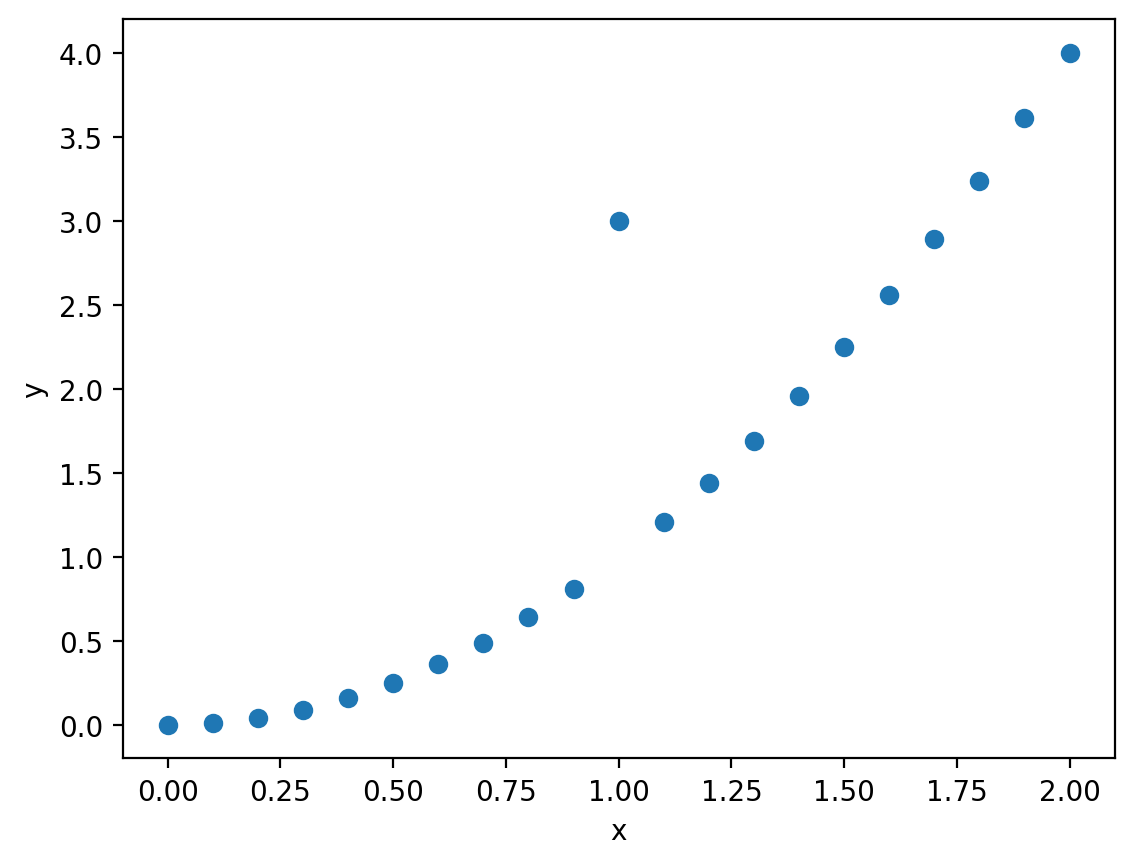

In [34]:
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Now, let's put some text at the point (1,3) that indicates that's an outlier. We can use the `text()` plotting method. There are three required elements: the x and y coordinates and the string to plot.

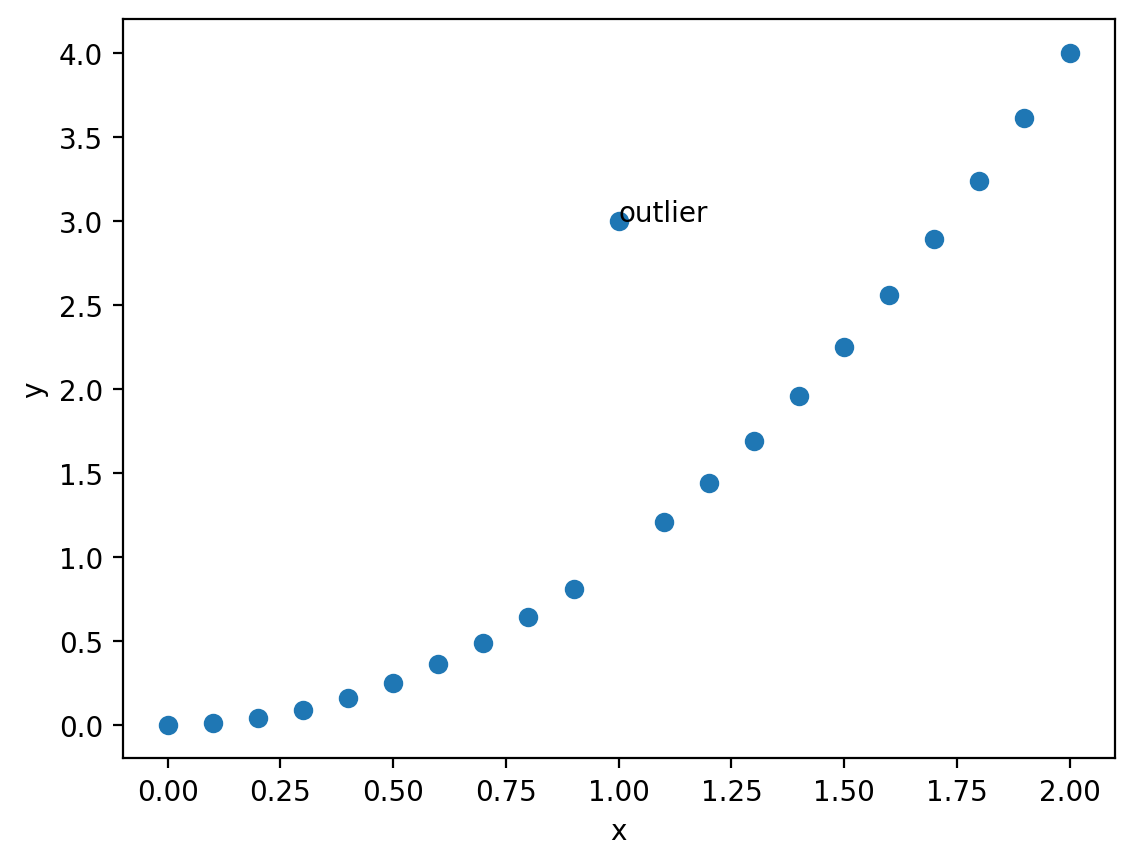

In [35]:
fig, ax = plt.subplots()
ax.scatter(x,y)

ax.text(1,3,'outlier')

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

This is helpful, but perhaps we want it not to overlap the marker and we want it to stand out more showing that datapoint could be an error. Let's shift the position a little so it doesn't overlap and adjust the [color keyword argument](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) to red:

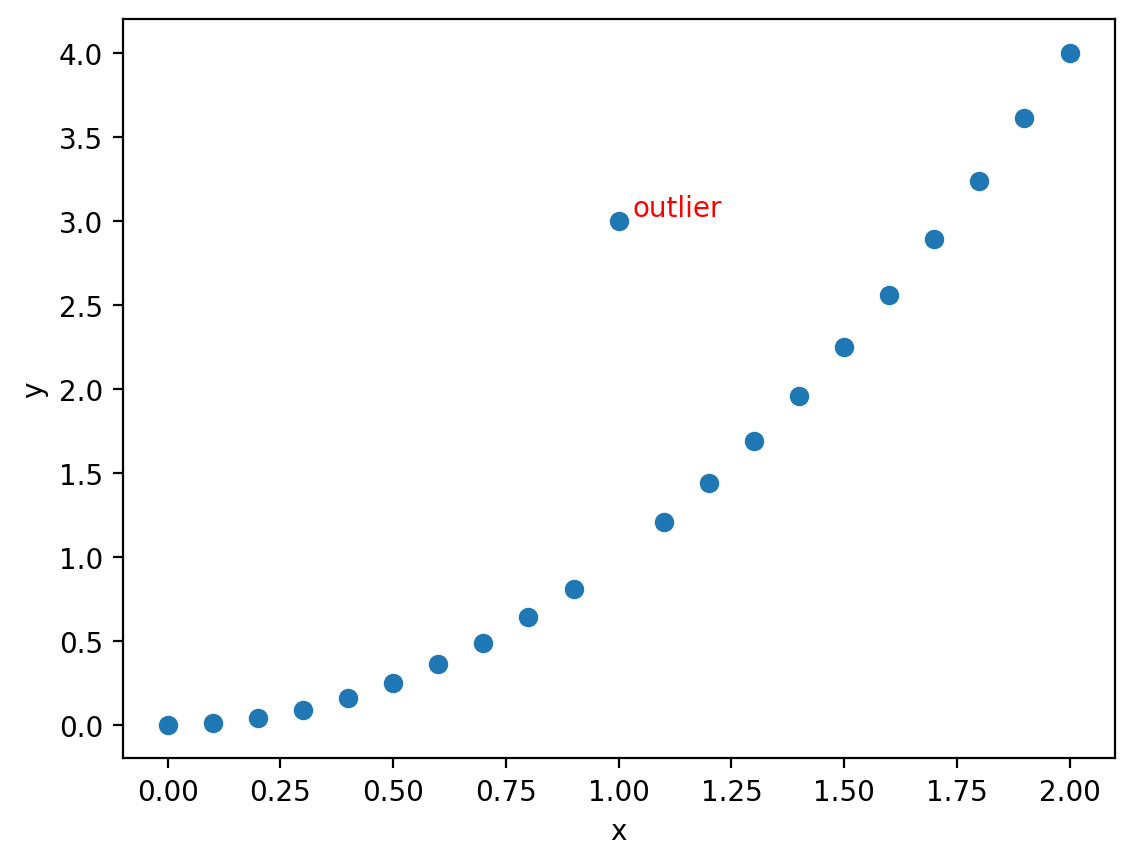

In [36]:
fig, ax = plt.subplots()
ax.scatter(x,y)

delta = 0.03
ax.text(1+delta,3+delta,'outlier', color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## Axes transforms for plotting text with respect to the data, Axes, or Figure

In the example above, we wanted to plot the text on the axes with respect to the data coordinates (the x and y values in our plot). Sometimes, we're more interested in generally positioning text relative to the axes itself, regardless of the scale of the data. For example, in the plot above, because of the data values we were plotting, the highest value on the x axis was just over 2. However, that changes with the data. We can use an axis transform to plot our text with respect to the basic axes object itself. We can make this transformation by setting the `transform` property to `ax.transAxes`. In that transformed state the left side of the x axis is always 0 and the right side is always 1. 

Using the plot above, let's plot text at four locations with respect to the Axes coordinates: $(0,0), (0,1), (1,0), (1,1)$

Text(0, 0.5, 'y')

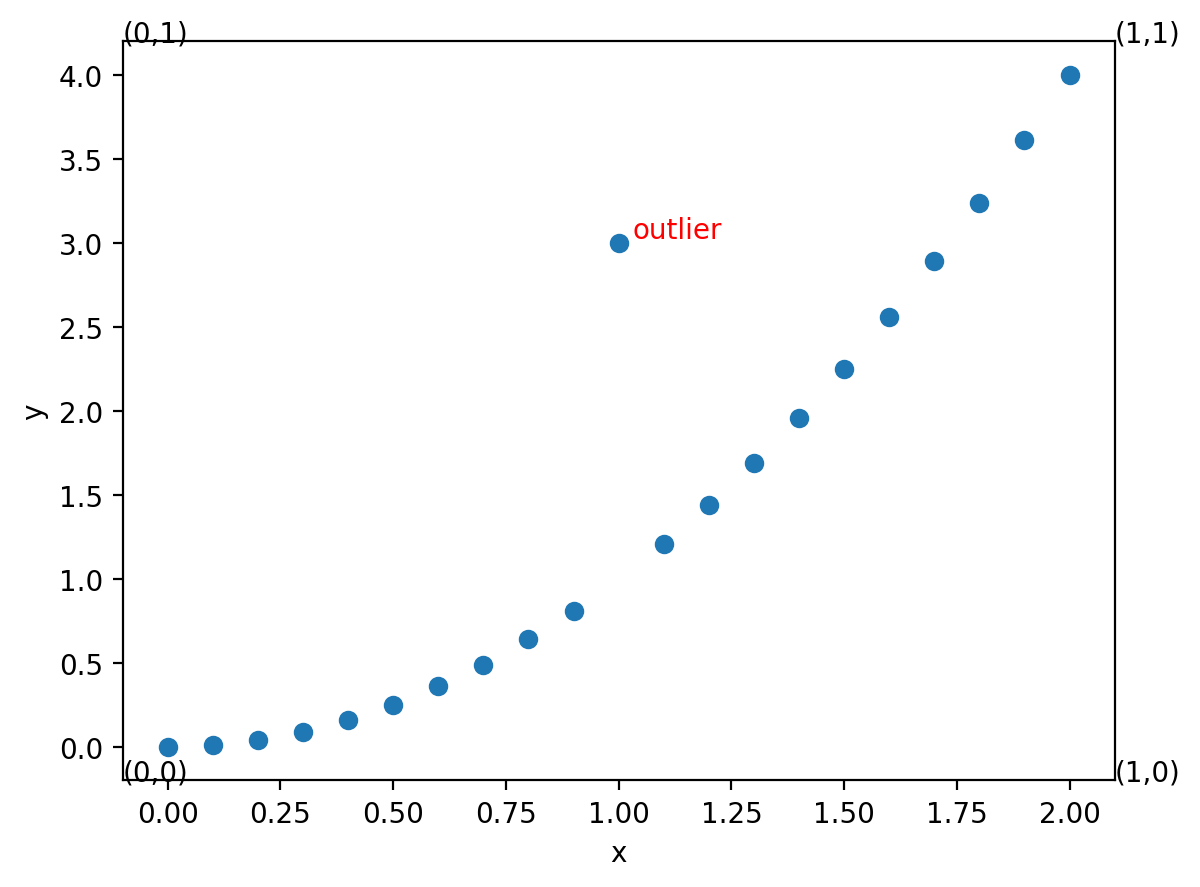

In [37]:
fig, ax = plt.subplots()
ax.scatter(x,y)

delta = 0.03
ax.text(1+delta,3+delta,'outlier', color='red')

# Plot each of the four points in transformed axes coordinates:
points = [(0,0), (0,1), (1,0), (1,1)]
for vx,vy in points:
    ax.text(vx,vy,f'({vx},{vy})', transform=ax.transAxes)

ax.set_xlabel('x')
ax.set_ylabel('y')

This can be useful, for example, if we wanted to manually add a title but just INSIDE the axes of the plot, we can do that by picking a value close to (0,1) with the transformed axes. We'll also set the vertical alignment of the text to the top of the text is aligned at the coordinate. We'll also make the font bold and a larger size.

Text(0, 0.5, 'y')

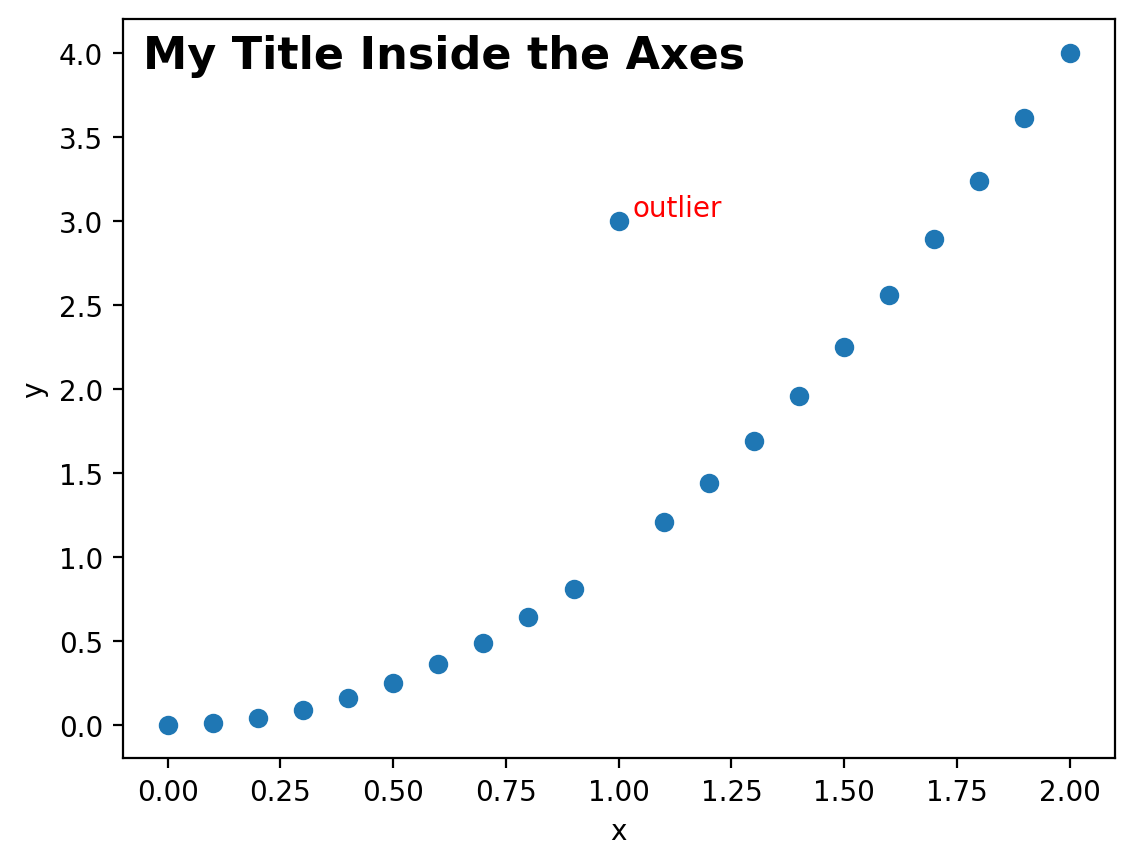

In [38]:
fig, ax = plt.subplots()
ax.scatter(x,y)

delta = 0.03
ax.text(1+delta,3+delta,'outlier', color='red')

# Plot my own title inside the axes:
ax.text(0.02,0.98,'My Title Inside the Axes', 
        transform=ax.transAxes,
        verticalalignment='top',
        fontsize=16,
        fontweight='bold')

ax.set_xlabel('x')
ax.set_ylabel('y')

This brings us to a common application of this approach: figure labeling. We can use this exact approach to provide annotations for labels for the subplots of figures. While we'll talk more about subplots later, focus here on how the text is used to place the letters A through D in the upper left of each plot using the technique we just discussed:

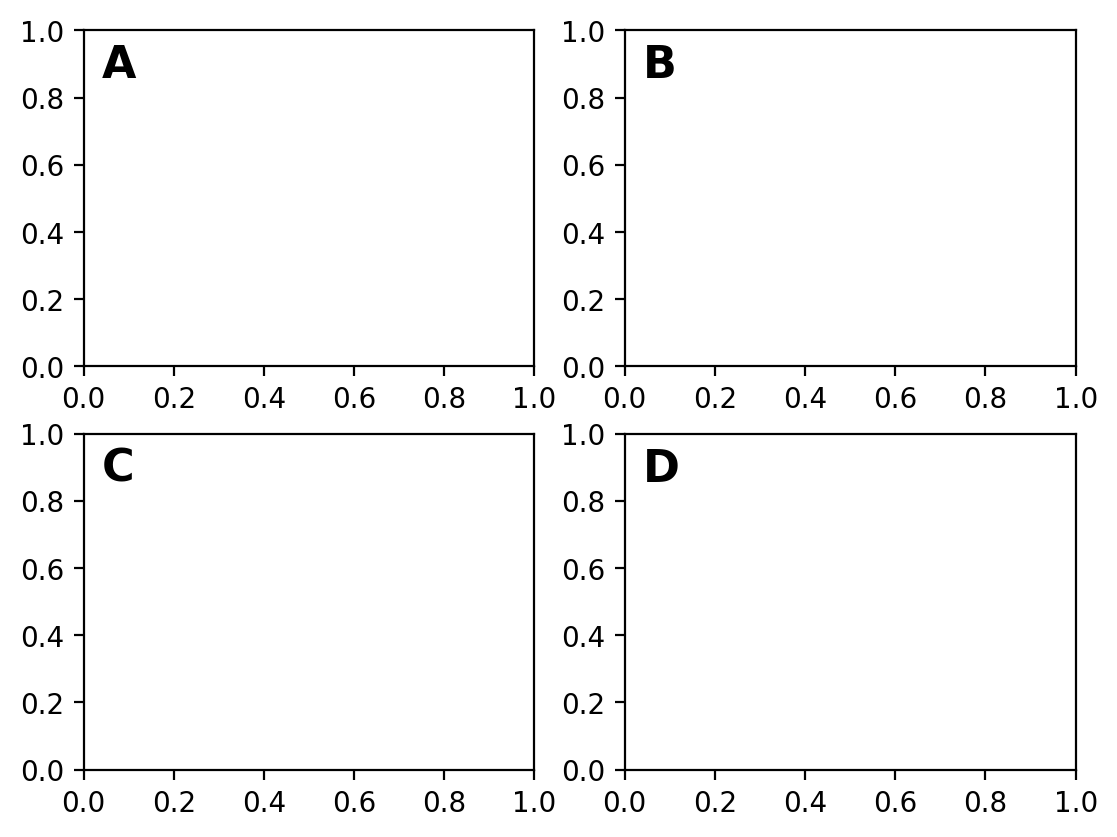

In [39]:
fig, axs = plt.subplots(2,2)

labels = ['A','B','C','D']
for i,ax in enumerate(axs.flatten()):
    ax.text(0.04,0.96,labels[i], 
        transform=ax.transAxes,
        verticalalignment='top',
        fontsize=16,
        fontweight='bold')

Sometimes we want to to plot text with respect to the Figure and not just the Axes. There are three primary transformations that are available through matplotlib to allow you to plot content with respect to the original data values (the default: `ax.transData`), the Axes (what we just saw: `ax.transAxes`) and the Figure (`fig.transFigure`). For the last one when we're plotting text with respect to figure coordinates, an alternative is to plot it directly in the figure using `fig.text()`, which would be preferable if the text is associated with the overall figure rather than just one of the subplots. 

Let's see an example that looks at all three of these transforms for plotting text in this case:

Text(0, 0, '↙ Figure: (0,0)')

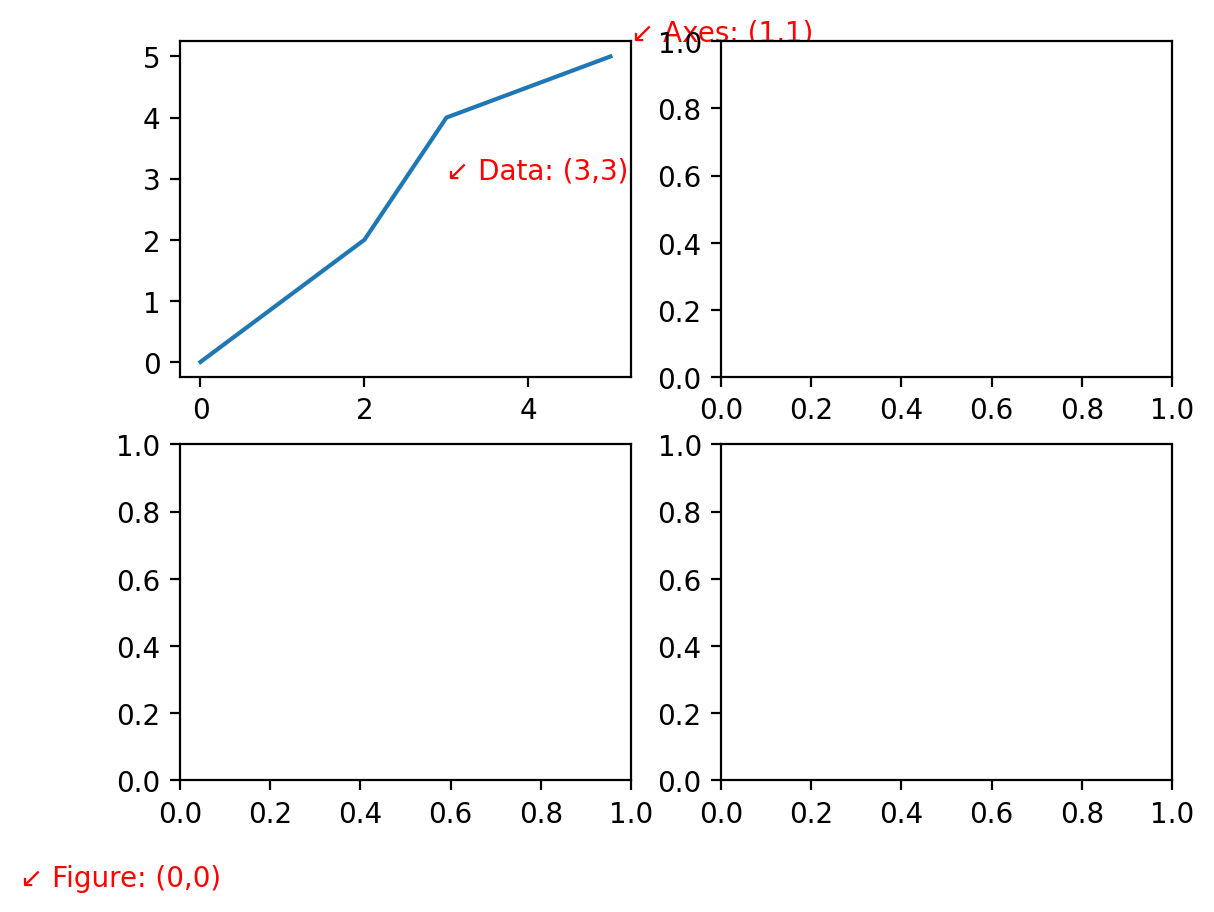

In [40]:
fig, axs = plt.subplots(2,2)

ax = axs[0,0]
ax.plot([0,1,2,3,4,5],[0,1,2,4,4.5,5])
ax.text(3,3,"↙ Data: (3,3)", color='red', transform=ax.transData)
ax.text(1,1,"↙ Axes: (1,1)", color='red', transform=ax.transAxes)
ax.text(0,0,"↙ Figure: (0,0)", color='red', transform=fig.transFigure)

Each of these transforms may be useful for different types of text annotations for your figure. One cautionary note is that when you plot with respect to the Axes, your text is only in front of the Axes for the Axes plotting the text. If you're more broadly looking to annotate the figure, you can use the Figure object to create the text. Consider the example below:

Text(0.75, 0.25, '↙ Figure: (0.75,0.25)')

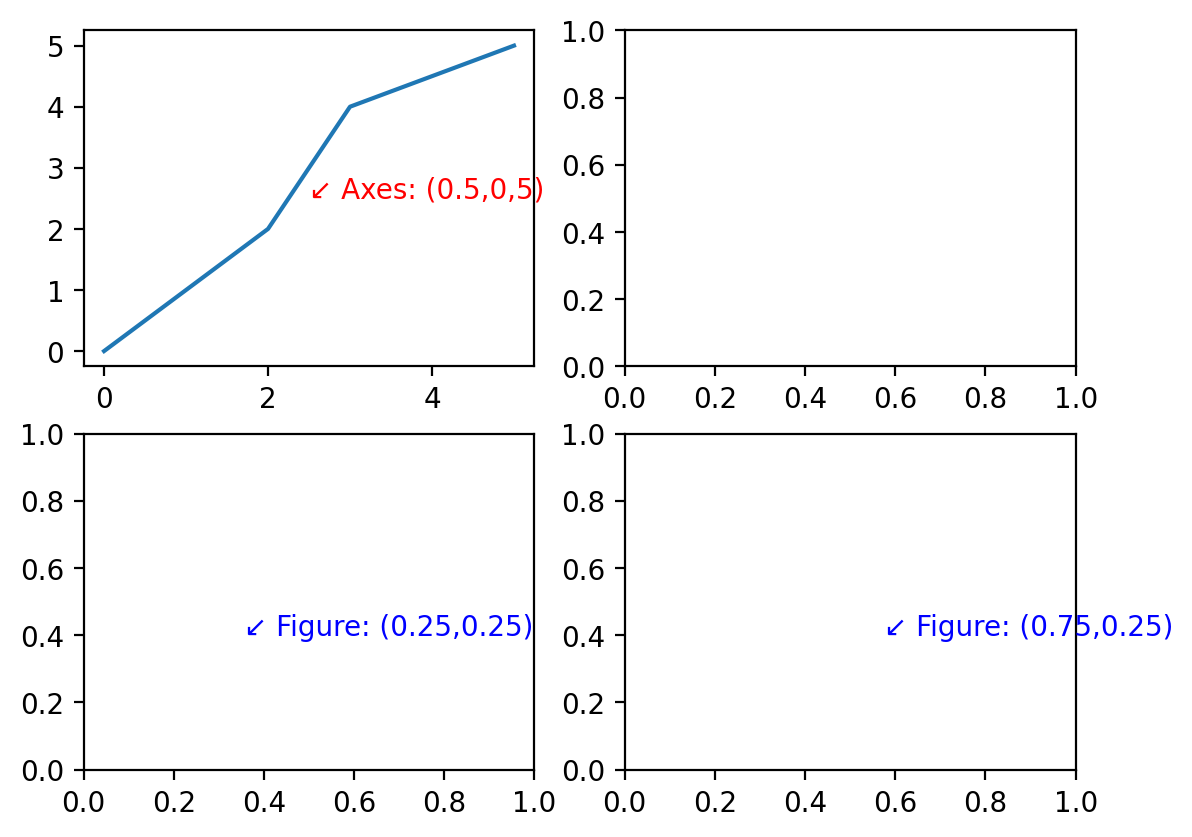

In [41]:
fig, axs = plt.subplots(2,2)

ax = axs[0,0]
ax.plot([0,1,2,3,4,5],[0,1,2,4,4.5,5])
ax.text(0.5,0.5,"↙ Axes: (0.5,0,5)", color='red', transform=ax.transAxes)
ax.text(1.5,0.5,"↙ Axes: (1.5,0,5)", color='red', transform=ax.transAxes) # This one is hidden behind another Axes object

fig.text(0.25,0.25,"↙ Figure: (0.25,0.25)", color='blue', transform=fig.transFigure) # Annotations to the figure are plotted above other annotations
fig.text(0.75,0.25,"↙ Figure: (0.75,0.25)", color='blue', transform=fig.transFigure)

We can see from the example above that while the Axes annotation was covered up by another Axes element, the same is not true for the text added to the Figure directly.

Using these approaches, you can use text to add notes to your plots or other annotations. There's also a tool for more bespoke annotations that may be of interest for point to data with arrows or lines, etc. You can find more on this in [matplotlib's documentation on annotations](https://matplotlib.org/stable/users/explain/text/annotations.html).

## Plotting text as data

Sometimes it's helpful to actually plot text as data. Let's load a more involved dataset, in this case data comparing the gross domestic product of countries versus their carbon dioxide emission. Let's explore if there's a relationship present. We'll start by loading the data, selecting our columns of interest, picking the data from one year (2018), and removing rows with `NaN` values. We'll then scatter plot those data:

In [42]:
import pandas as pd

wdi_data = (
    "https://raw.githubusercontent.com/nickeubank/"
    "practicaldatascience/master/Example_Data/wdi_plotting.csv"
)
world = pd.read_csv(wdi_data)
world = pd.read_csv(wdi_data)[['Year','Country Name','Country Code','GDP per capita (constant 2010 US$)','CO2 emissions (metric tons per capita)']]
world = world[world.Year == 2018]
world = world.dropna(axis=0)
world.sample(5)

,Year,Country Name,Country Code,GDP per capita (constant 2010 US$),CO2 emissions (metric tons per capita)
10221,2018,Bhutan,BTN,3128.827201,1.829278
10247,2018,Croatia,HRV,15971.147670,4.055929
10383,2018,St. Vincent and the Grenadines,VCT,6852.599956,2.540604
10331,2018,Montenegro,MNE,8253.329046,4.049969
10372,2018,Slovak Republic,SVK,20516.927900,6.058635


Text(0, 0.5, 'CO2 emissions (metric tons per capita)')

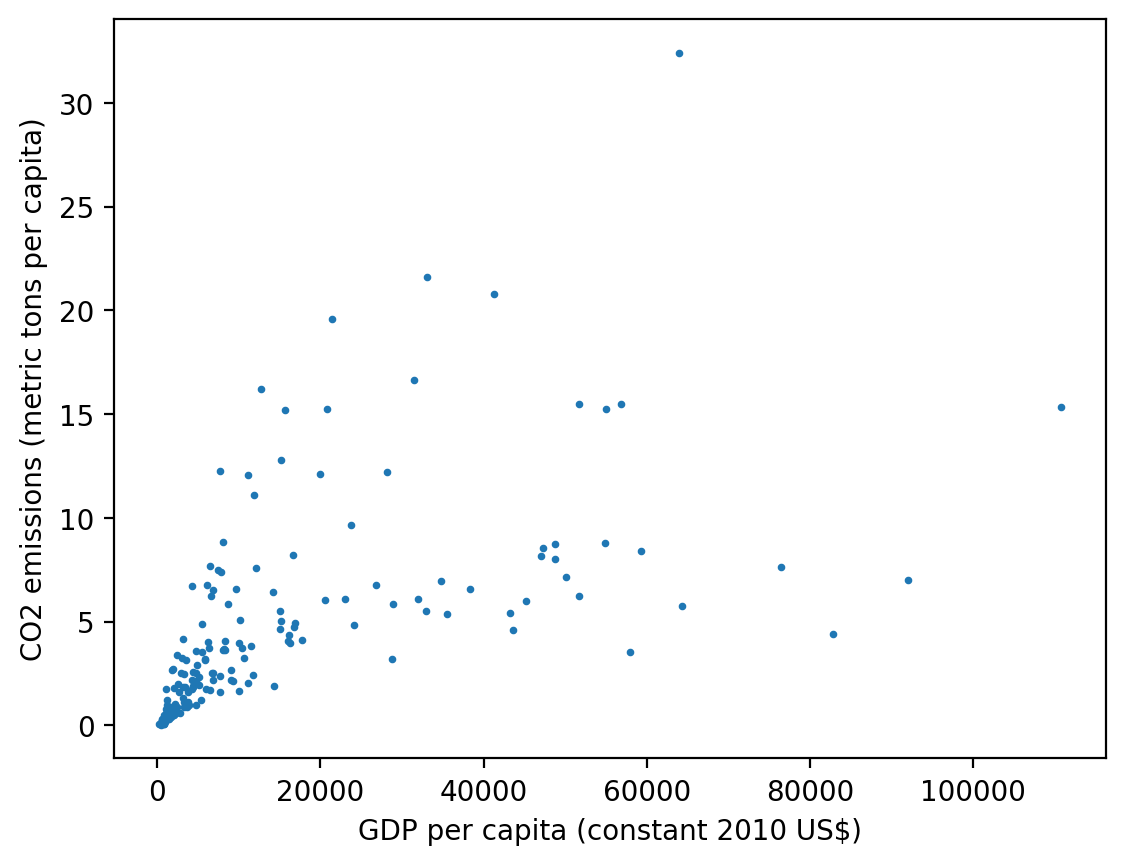

In [43]:
fig, ax = plt.subplots()

ax.scatter(world['GDP per capita (constant 2010 US$)'],world['CO2 emissions (metric tons per capita)'],s=3) # The s keyword parameter controls the marker size
ax.set_xlabel('GDP per capita (constant 2010 US$)')
ax.set_ylabel('CO2 emissions (metric tons per capita)')

One thing to note here is that most of the data are clumped in the lower left-hand corner of the plot and the data seem to be on vastly different orders of magnitude where only a handful of countries have GDP or emissions at the extremes of the whole range. This is often a good opportunity to deploy logarithmic scaling.

Logarithmic scaling transforms how the ticks are spaced along an axis. Normally if we had that values in our dataset of $[0.1,1,10,100,1000]$, our axis would need to take the highest value and divide it up into equal parts and we may get ticks at $[0,250,500,750,1000]$. The values of 0.1, 1, and 10 would all be located at the same spot relative to that scale. A logarithmic scaling instead transforms the values so that the ticks are spaced according to a transformation of $x_{transformed}=\log_{10}(x)$. According to this transformation, the values $[0.1,1,10,100,1000]$ are transformed into $[-1,0,1,2,3]$ and those values are spaced evenly on the plot and noted as $[10^{-1}, 10^0, 10^1, 10^2, 10^3]$. This allows the data to be viewed across those orders of magnitude, as shown in the figure below.

![Linear versus logarithmic scaling](img/5.1-log-scaling.png)

Fortunately, we can easily apply a log transform by setting the `xscale` and `yscale` properties of the axes object using the `set_xscale('log')` and `set_yscale('log')` commands:

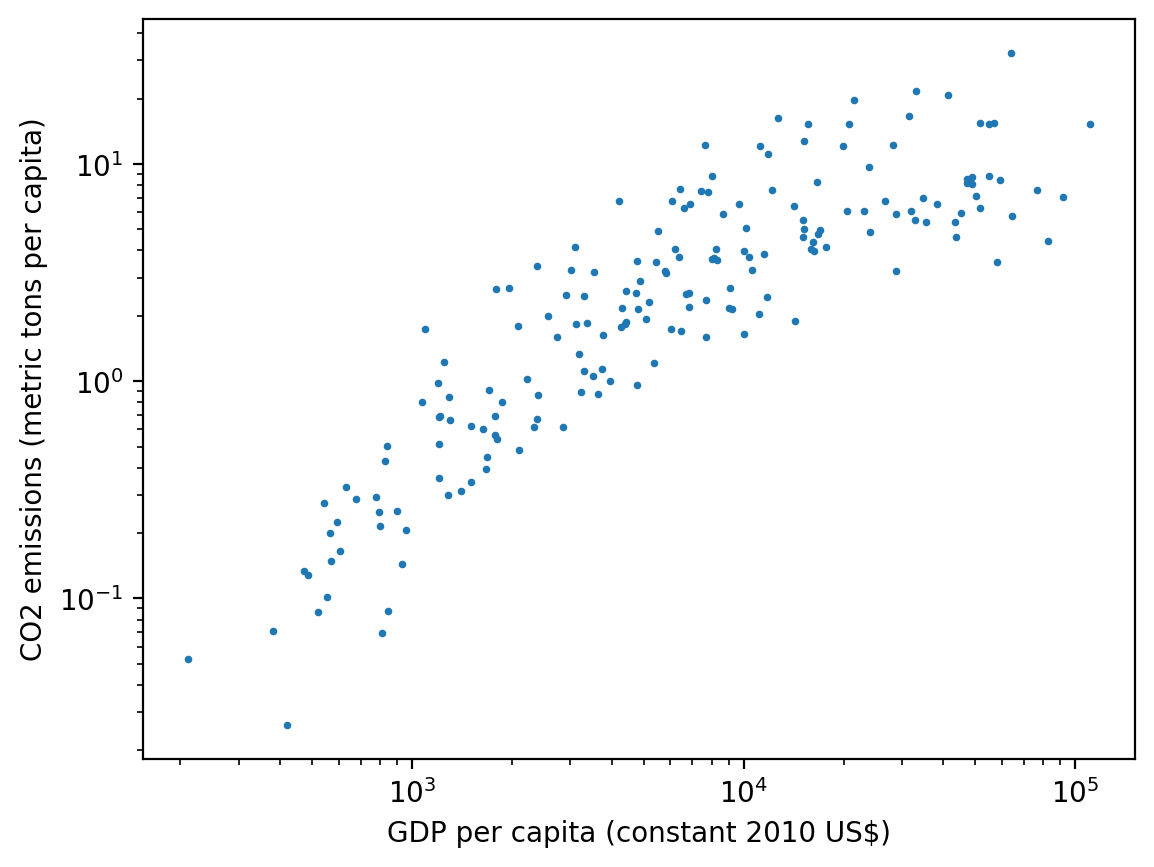

In [44]:
fig, ax = plt.subplots()

ax.scatter(world['GDP per capita (constant 2010 US$)'],world['CO2 emissions (metric tons per capita)'],s=3)
ax.set_xlabel('GDP per capita (constant 2010 US$)')
ax.set_ylabel('CO2 emissions (metric tons per capita)')
ax.set_xscale('log')
ax.set_yscale('log')

There does seem to be a relationship here, but what's unclear now is which dot represents which country? Instead of plotting dots, let's plot the three-letter country codes in the respective locations on the scatter plot. We'll make the figure size a bit larger as well, to accommodate the text. To do this, we'll need to plot each text item separately.

We also make a few additional adjustments to the plot to make it easier to read: we set the `xlim` and `ylim` properties to make sure the axes fully encompass the text due to the log x and y scale transformation. We also adjust the fontsize of the text that's plotted to be small so the countries are readable.

(0.01, 100.0)

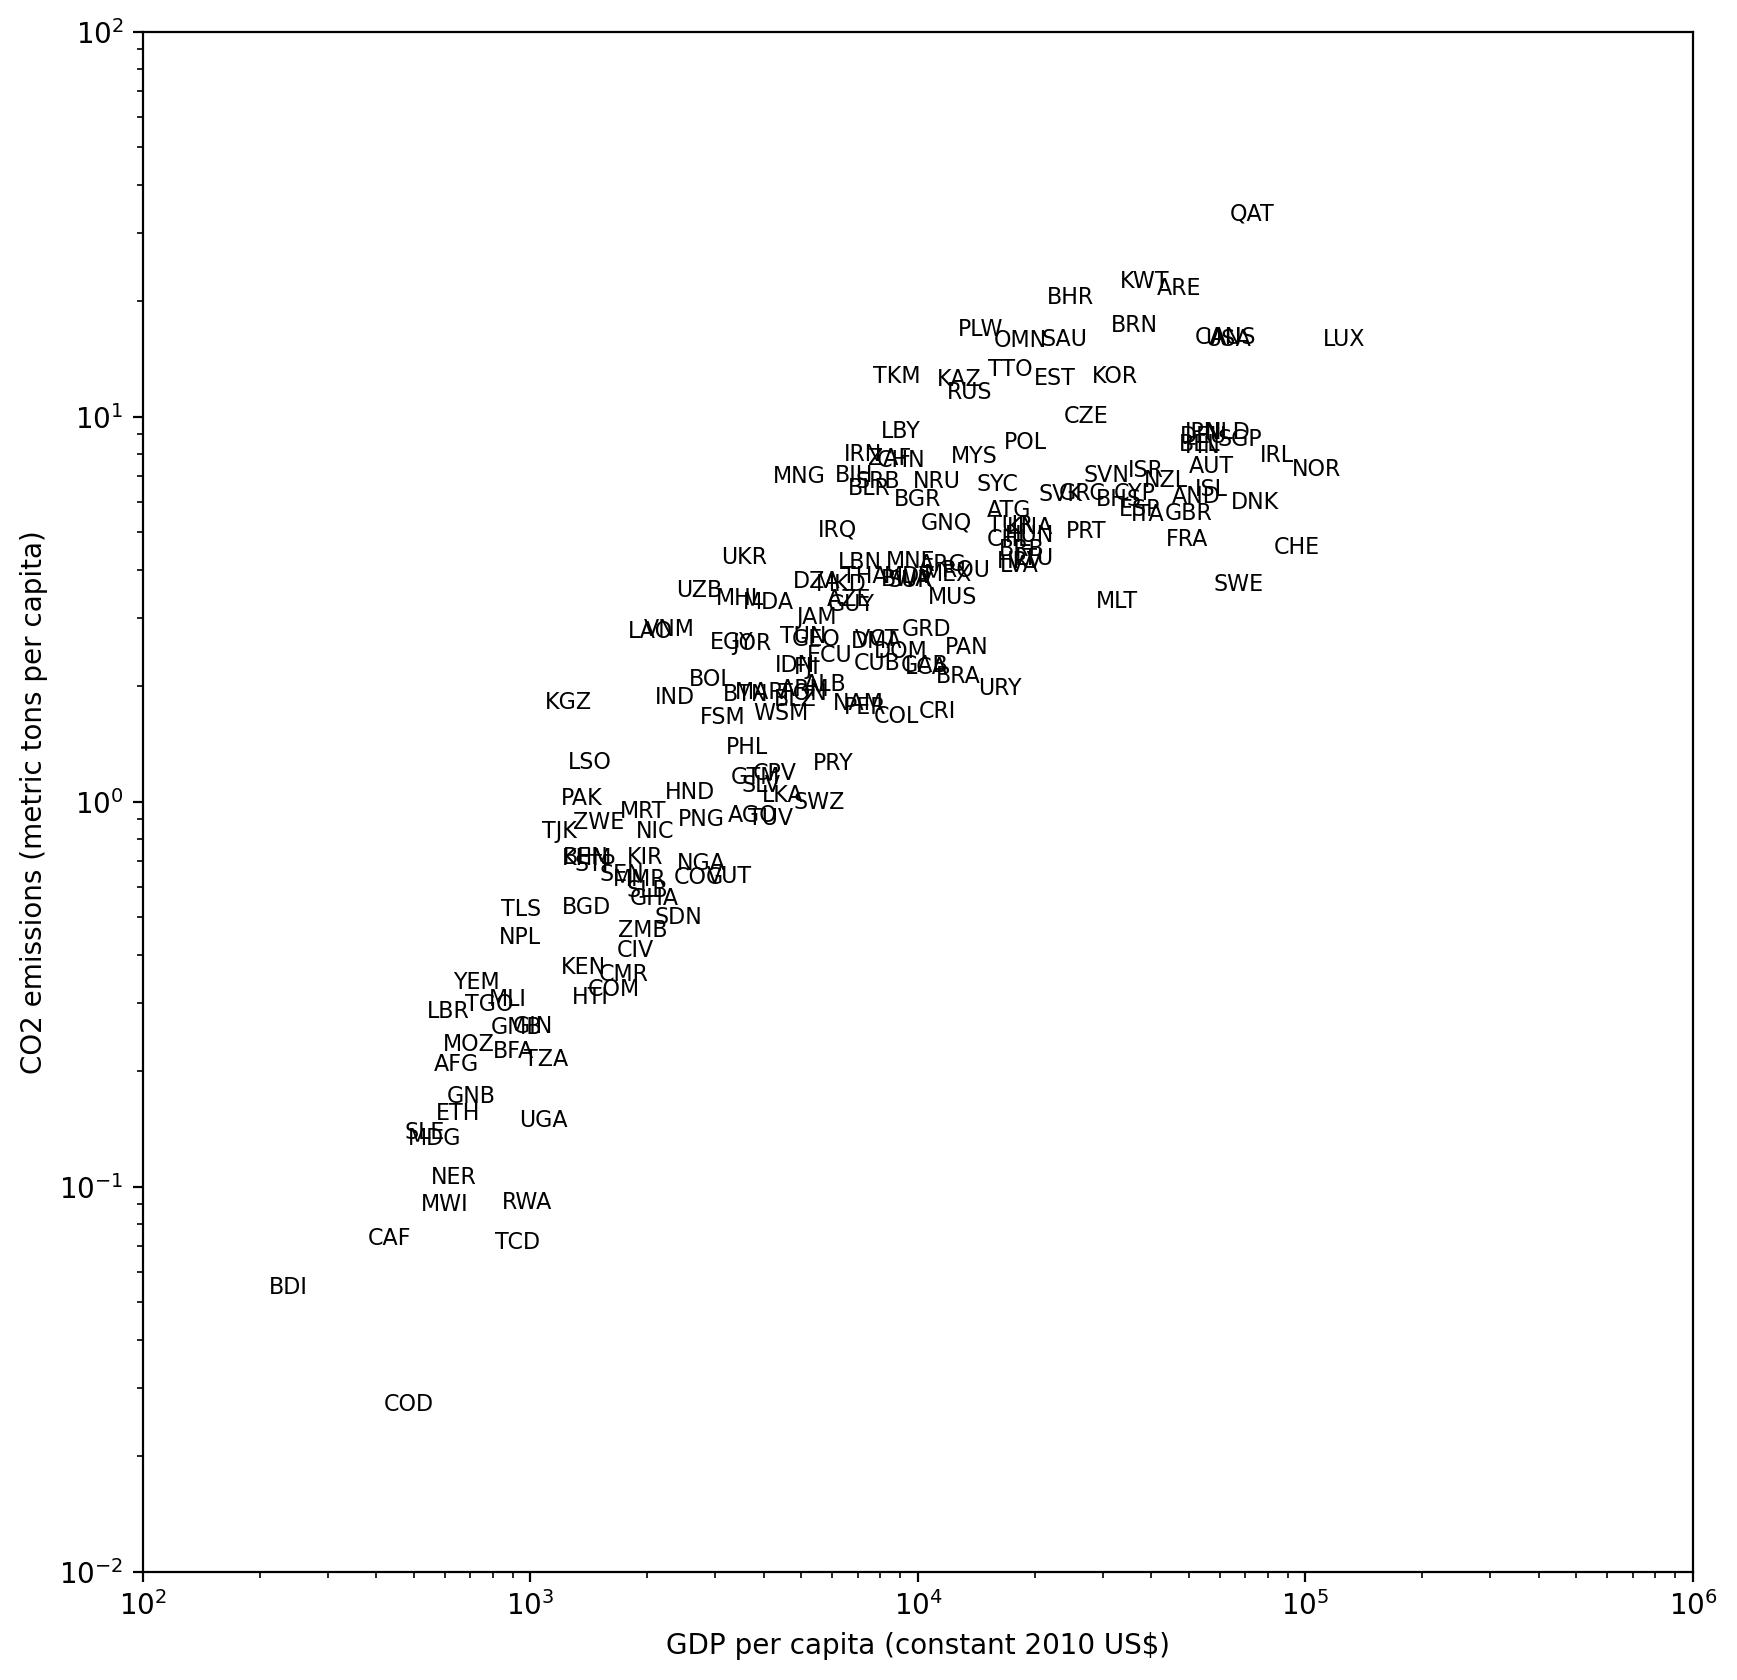

In [45]:
gdp = world['GDP per capita (constant 2010 US$)']
co2 = world['CO2 emissions (metric tons per capita)']
country = world['Country Code']

fig, ax = plt.subplots(figsize=(10,10))

for vx,vy,vs in zip(gdp,co2,country):
    ax.text(vx,vy,vs, fontsize=8)

ax.set_xlabel('GDP per capita (constant 2010 US$)')
ax.set_ylabel('CO2 emissions (metric tons per capita)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e2,1e6])
ax.set_ylim([1e-2,1e2])

We certainly can read many country codes in the above plot and tell the differences between, for example, Luxembourg (LUX) and Qatar (QAT) in the upper right and Burundi (BDI) and the 
Democratic Republic of the Congo (COD) in the lower left.

## References

VanderPlas, J., 2016. Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.".